#### Inspecting an experiment

It's created by running `python examples/entrypoint/experiment.py`

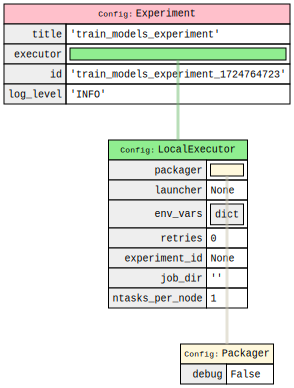

In [1]:
import nemo_run as run

exp = run.Experiment.from_id("train_models_experiment_1724764723")
exp

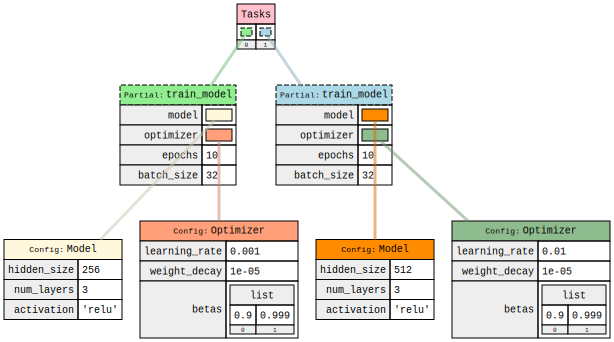

In [2]:
exp.tasks

In [8]:
exp.status()

Experiment Status for train_models_experiment_1724764723

Task 0: train_model_0
- Status: SUCCEEDED
- Executor: LocalExecutor
- Job id: train_model_0_direct_run
- Local Directory: /Users/romeyn/.nemo_run/experiments/train_models_experiment/train_models_experiment_1724764723/train_model_0

Task 1: train_model_1
- Status: SUCCEEDED
- Executor: LocalExecutor
- Job id: train_model_1_direct_run
- Local Directory: /Users/romeyn/.nemo_run/experiments/train_models_experiment/train_models_experiment_1724764723/train_model_1

#### Compare two experiments

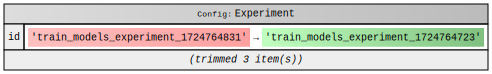

In [5]:
exp_2 = run.Experiment.from_id("train_models_experiment_1724764831")

exp.diff(exp_2)

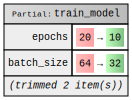

In [6]:
exp.tasks[0].diff(exp_2.tasks[0])

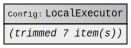

In [7]:
exp.executor.diff(exp_2.executor)